# Exploration of WWatch3 Results for 12Apr17 Forecast Run

Basic exploration and visualization of wwatch3 fields and points results files from 
Salish Sea Nowcast system SoG-waves run.

From 12-Apr-2017 forecast run initiated with 
quiescent initial wave state on 11-Apr-2017,
and forced with hourly HRDPS winds and Salish Sea NEMO nowcast/forecast currents.

In [2]:
import cmocean
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
%matplotlib inline

## Fields Results

In [4]:
wwf = xr.open_dataset('SoG_ww3_fields_20170412_20170414.nc')
wwf

<xarray.Dataset>
Dimensions:    (latitude: 661, longitude: 572, time: 120)
Coordinates:
  * longitude  (longitude) float32 234.0 234.007 234.014 234.021 234.028 ...
  * latitude   (latitude) float32 48.0 48.0045 48.009 48.0135 48.018 48.0225 ...
  * time       (time) datetime64[ns] 2017-04-12 2017-04-12T00:29:59.971200 ...
Data variables:
    MAPSTA     (latitude, longitude) int16 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 ...
    ucur       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    vcur       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    uwnd       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    vwnd       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    hs         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    lm         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    t02        (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    fp         (time, lat

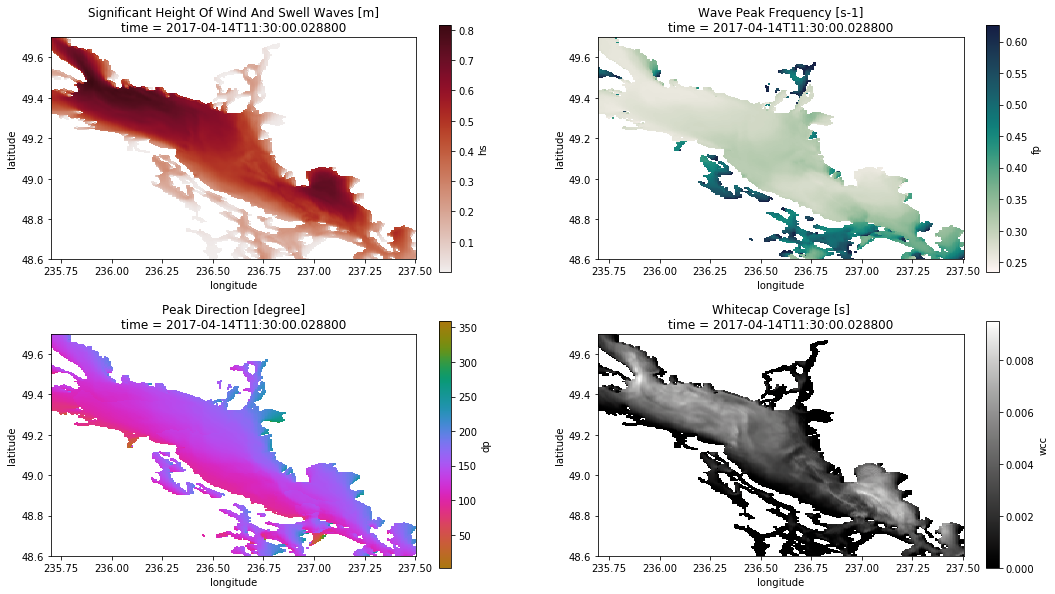

In [24]:
time='2017-04-14 11:30:00'
longitude=slice(235.7, 237.5)
latitude=slice(48.6, 49.7)

fig, axs = plt.subplots(2, 2, figsize=(18, 10))
wwf.hs.sel(time=time, longitude=longitude, latitude=latitude).plot(ax=axs[0, 0], cmap=cmocean.cm.amp)
axs[0, 0].set_title(f'{wwf.hs.long_name.title()} [{wwf.hs.units}]\n{axs[0, 0].get_title()}')
axs[0, 0].set_aspect('equal')
wwf.fp.sel(time=time, longitude=longitude, latitude=latitude).plot(ax=axs[0, 1], cmap=cmocean.cm.tempo)
axs[0, 1].set_title(f'{wwf.fp.long_name.title()} [{wwf.fp.units}]\n{axs[0, 1].get_title()}')
axs[0, 1].set_aspect('equal')
wwf.dp.sel(time=time, longitude=longitude, latitude=latitude).plot(ax=axs[1, 0], cmap=cmocean.cm.phase)
axs[1, 0].set_title(f'{wwf.dp.long_name.title()} [{wwf.dp.units}]\n{axs[1, 0].get_title()}')
axs[1, 0].set_aspect('equal')
wwf.wcc.sel(time=time, longitude=longitude, latitude=latitude).plot(ax=axs[1, 1], cmap=cmocean.cm.gray)
axs[1, 1].set_title(f'{wwf.wcc.long_name.title()} [{wwf.t02.units}]\n{axs[1, 1].get_title()}')
axs[1, 1].set_aspect('equal')

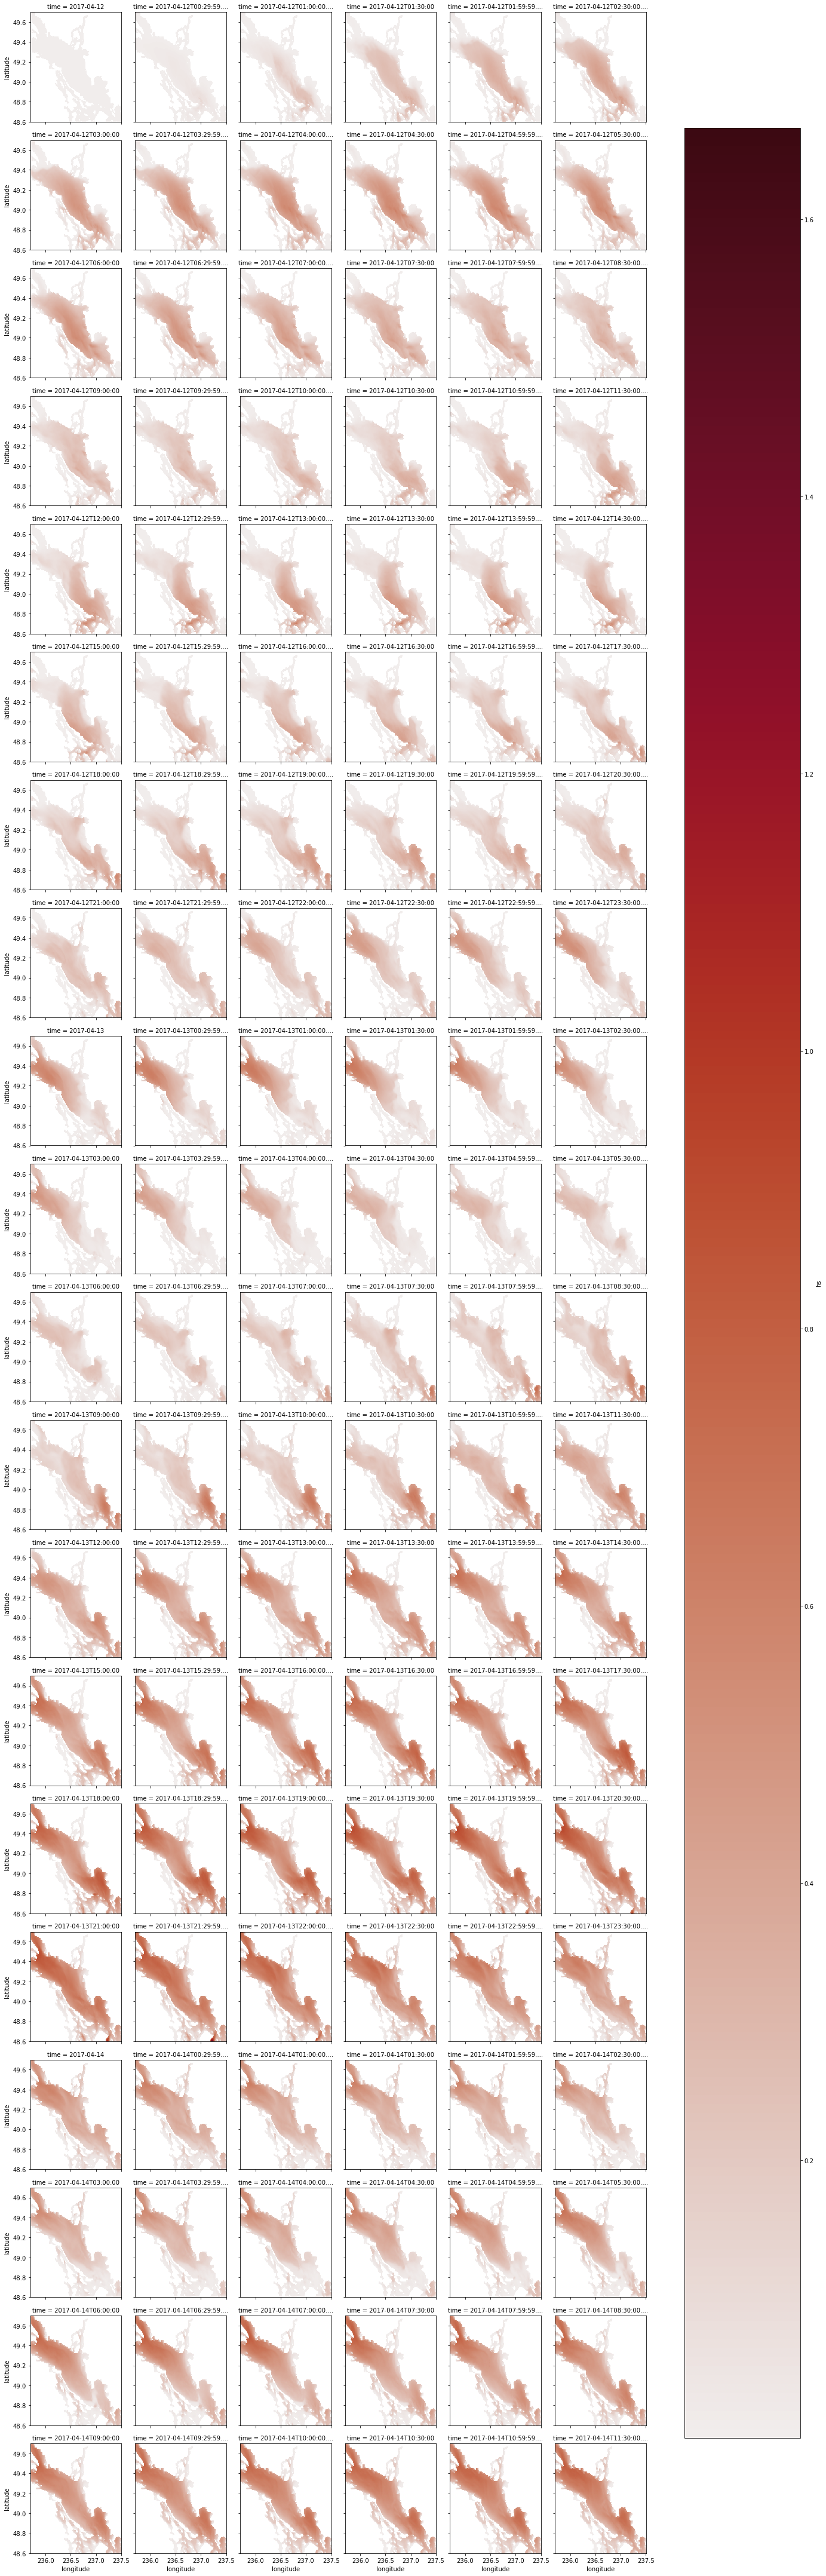

In [19]:
wwf.hs.sel(longitude=longitude, latitude=latitude).plot(col='time', col_wrap=6, cmap=cmocean.cm.amp)

## Points Results

In [5]:
wwp = xr.open_dataset('SoG_ww3_points_20170412_20170414.nc')
wwp

<xarray.Dataset>
Dimensions:       (station: 3, string16: 16, time: 360)
Coordinates:
  * time          (time) datetime64[ns] 2017-04-12 ...
  * station       (station) float64 1.0 2.0 3.0
  * string16      (string16) float64 nan nan nan nan nan nan nan nan nan nan ...
Data variables:
    station_name  (station, string16) |S1 b'C' b'4' b'6' b'1' b'3' b'4' b'P' ...
    longitude     (time, station) float64 236.5 236.3 235.0 236.5 236.3 ...
    latitude      (time, station) float64 48.66 49.34 49.91 48.66 49.34 ...
    wnd           (time, station) float64 2.665 5.209 2.203 2.879 5.415 2.24 ...
    wnddir        (time, station) float64 348.2 294.1 310.7 346.2 293.2 ...
    hs            (time, station) float64 2.177e-10 5.906e-06 2.142e-10 ...
    tp            (time, station) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    product_name: SoG_ww3_points_20170412_tab.nc
    area: SoG_BCgrid_00500m
    data_type: OCO spectra 2D
    format_version: 1.1
    southernmost_latitude: 

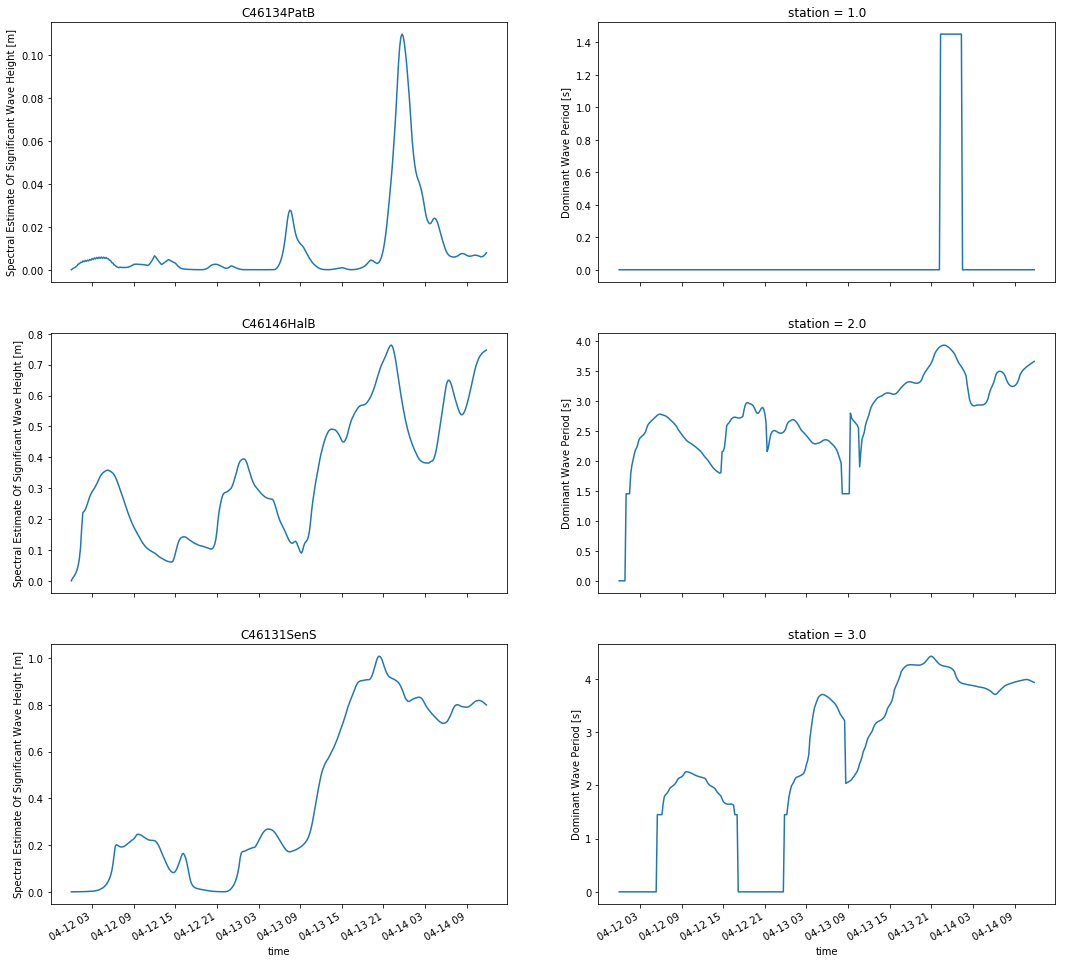

In [15]:
fig, axs = plt.subplots(len(wwp.station), 2, figsize=(18, 6*len(wwp.station)))
for i in range(len(wwp.station)):
    wwp.hs[:, i].plot(ax=axs[i, 0])
    axs[i, 0].set_title(''.join([c.decode() for c in wwp.station_name.values[i]]))
    axs[i, 0].set_ylabel(f'{wwp.hs.long_name.title()} [{wwp.hs.units}]')
    wwp.tp[:, i].plot(ax=axs[i, 1])
    axs[i, 1].set_ylabel(f'{wwp.tp.long_name.title()} [{wwp.tp.units}]')